In [152]:
print("... starting with CHAPTER 5")

... starting with CHAPTER 5


In [153]:
import torch 
from chap4 import GPTModel
from chap4 import GPT_CONFIG_124M




In [154]:
GPT_CONFIG_124M={
'vocab_size': 50257,
 'context_length': 256,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'bias_': False}

In [155]:
GPT_CONFIG_124M

{'vocab_size': 50257,
 'context_length': 256,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'bias_': False}

In [156]:
torch.manual_seed(123)

model = GPTModel(GPT_CONFIG_124M)

In [157]:
model.eval()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FFN(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): Gelu()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [158]:
import tiktoken

from chap4 import generate_text_simple

def text_to_token_ids(text,tokenizer):
    encoded=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
    encoded_tensor=torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor


def token_ids_to_text(input_ids, tokenizer):
    flat = input_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())

start_context="मेरा नाम भाव्य गोयल है "
tokenizer=tiktoken.get_encoding('gpt2')

token_ids=generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context,tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M['context_length'])



In [159]:
token_ids

tensor([[11976,   106, 24231,   229, 11976,   108, 48077, 28225,   101, 48077,
         11976,   106, 28225,   255, 48077, 11976,   113, 24231,   235, 11976,
           107, 28225,   245, 24231,   233, 11976,   107, 11976,   110, 28225,
           117, 24231,   230,   220,  5302, 23906, 30013,  6104,  5970, 21213,
         30311,  2266, 33192, 26071]])

In [160]:
output_text = token_ids_to_text(token_ids,tokenizer)

In [161]:
output_text

'मेरा नाम भाव्य गोयल है  Jo720 trackerEven incor beard Gujarat red robe acoustic'

In [162]:
text1="My name is 777GPT Model "
text2="I am inspired by ILYA "
encoded_txt1=torch.tensor(tokenizer.encode(text1))
encoded_txt2=torch.tensor(tokenizer.encode(text2))
encoded_txt1.shape,encoded_txt2.shape


(torch.Size([8]), torch.Size([8]))

In [163]:
input_batch=torch.stack((encoded_txt1,encoded_txt2),dim=0)

In [164]:
input_batch

tensor([[ 3666,  1438,   318, 35534,    38, 11571,  9104,   220],
        [   40,   716,  7867,   416,   314, 11319,    32,   220]])

In [165]:
target_text1='name is 777GPT I'
target_text2='am inspired by Ilya ,'
decoded_target_txt1=torch.tensor(tokenizer.encode(target_text1))
decoded_target_txt2=torch.tensor(tokenizer.encode(target_text2))
decoded_target_txt1.shape,decoded_target_txt2.shape
output_target=torch.stack((decoded_target_txt1,decoded_target_txt2),dim=0)


In [166]:
decoded_target_txt1.shape,decoded_target_txt2.shape

(torch.Size([6]), torch.Size([6]))

In [167]:
inputs = torch.tensor([[16833, 3626, 6100], # ["every effort moves",
[40, 1107, 588]]) # "I really like"]

In [168]:
inputs

tensor([[16833,  3626,  6100],
        [   40,  1107,   588]])

In [169]:
targets = torch.tensor([[3626, 6100, 345 ], # [" effort moves you",
[1107, 588, 11311]]) # " really like chocolate"]

In [170]:
targets

tensor([[ 3626,  6100,   345],
        [ 1107,   588, 11311]])

In [171]:
with torch.no_grad():
    logits = model(inputs)

In [172]:
logits.shape

torch.Size([2, 3, 50257])

In [173]:
prob=torch.softmax(logits,dim=-1)

In [174]:
prob.shape

torch.Size([2, 3, 50257])

In [175]:
predicted_tokens=torch.argmax(prob,dim=-1)
predicted_tokens

tensor([[16657,   339, 42826],
        [49906, 29669, 41751]])

In [176]:
print('target batch 1:',token_ids_to_text(targets[0],tokenizer))
print('the converted text1:',token_ids_to_text(predicted_tokens[0],tokenizer))
print('target for batch 2',token_ids_to_text(targets[1],tokenizer))
print('the converted text:',token_ids_to_text(predicted_tokens[1],tokenizer))




target batch 1:  effort moves you
the converted text1:  Armed heNetflix
target for batch 2  really like chocolate
the converted text:  pressuring empoweredfaith


In [177]:
target_probas1=prob[1,[0,1,2],targets[1]]
target_probas1

tensor([    0.0000,     0.0001,     0.0000])

In [178]:
target_probas2=prob[0,[0,1,2],targets[0]]

In [179]:
log_probas=torch.log(
    torch.cat((target_probas1,target_probas2))
)

In [180]:
log_probas

tensor([-11.4798,  -9.7764, -12.2561,  -9.5042, -10.3796, -11.3677])

In [181]:
avg_log_probas = torch.mean(log_probas)

In [182]:
neg_avg_log_prob = -1 * avg_log_probas
neg_avg_log_prob

tensor(10.7940)

In [183]:
print('logits shape:',logits.shape)
print('targets shape:',targets.shape)

logits shape: torch.Size([2, 3, 50257])
targets shape: torch.Size([2, 3])


In [184]:
logits_flatten=logits.flatten(0,1)
targets_flatten=targets.flatten()
print("flattened logits:",logits_flatten.shape)
print("Flattened Targets: ",targets_flatten.shape)

flattened logits: torch.Size([6, 50257])
Flattened Targets:  torch.Size([6])


In [185]:
loss=torch.nn.functional.cross_entropy(logits_flatten,targets_flatten)
print(loss)

tensor(10.7940)


In [186]:

perplexity = torch.exp(loss)
perplexity

tensor(48725.8203)

In [187]:
file_path='the-verdict.txt'
with open(file_path,'r') as file:
    text_data=file.read()
print(len(text_data))    


20479


In [188]:
print(len(tokenizer.encode(text_data)))

5145


In [189]:
train_ratio = 0.90
split_idx=int(train_ratio * len(text_data))
train_data=text_data[:split_idx]
val_data=text_data[split_idx:]

In [190]:
from torch.utils.data import DataLoader,Dataset

def create_dataloader_v1(txt,batch_size=4,max_length=267,
                         stride=128,shuffle=True,drop_last=True,
                         num_workers=0):
    bpe_tokenizer=tiktoken.get_encoding('gpt2')
    dataset=GPTDatasetV1(txt,bpe_tokenizer,max_length,stride)
    dataloader=DataLoader(dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers)
    
    return dataloader


class GPTDatasetV1(Dataset):
    def __init__(self,text,tokenizer,max_length,stride):
        super().__init__()
        self.input_ids=[]
        self.target_ids=[]

        token_ids=tokenizer.encode(text)


        for i in range(0,len(token_ids)-max_length,stride):
            input_chunk=token_ids[i:i+max_length]
            target_chunk=token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx],self.target_ids[idx]
    


torch.manual_seed(123)

train_dataloader = create_dataloader_v1(
    txt=train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],
    stride=GPT_CONFIG_124M['context_length'],
    shuffle=True,
    drop_last=True,
    num_workers=0
)

val_dataloader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],
    stride=GPT_CONFIG_124M['context_length'],
    shuffle=True,
    drop_last=True,
    num_workers=0
    
)

In [191]:
print('Train loader')
for x,y in train_dataloader:
    print(x.shape,y.shape)
len(train_dataloader)    

Train loader
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])


9

In [192]:
print('VAL loader')
for x,y in val_dataloader:
    print(x.shape,y.shape)

VAL loader
torch.Size([2, 256]) torch.Size([2, 256])


In [193]:
def calc_loss_batch(input_batch,target_batch,model,device):
    input_batch = input_batch.to(device)
    target_batch= target_batch.to(device)
    logits=model(input_batch)
    loss=torch.nn.functional.cross_entropy(
        logits.flatten(0,1),target_batch.flatten()
    )
    return loss

In [194]:
def calc_loss_loader_data(data_loader , model ,device,num_batches=None):
    total_loss=0
    if len(data_loader) == 0 :
        return float("nan")
    elif num_batches is None:
        num_batches=len(data_loader)
    else:
        num_batches = min(num_batches,len(data_loader))
    for i , (input_batch,target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(
                input_batch,target_batch,model,device
            ) 
            total_loss+=loss.item()
        else:
            break
        return total_loss/num_batches           

In [195]:
device=torch.device('cpu')
model.to(device)
with torch.no_grad():
    train_loss=calc_loss_loader_data(model=model,device=device,data_loader=train_dataloader)
    val_loss=calc_loss_loader_data(model=model,device=device,data_loader=val_dataloader)
print("training loss:",train_loss)
print('validation loss:',val_loss)    

training loss: 1.2200181749131944
validation loss: 10.981106758117676


In [196]:
device

device(type='cpu')

In [197]:
# def evaluate_model(model,train_dataloader,val_dataloader,eval_iter):
#     model.eval()

#     with torch.no_grad():
#         train_loss = calc_loss_loader_data(
#             train_dataloader,model,device,num_batches=eval_iter
#         )
#         val_loss = calc_loss_loader_data(
#             val_dataloader,model,device,num_batches=eval_iter
#         )
#     model.train()
#     return train_loss,val_loss  



# def generate_and_print_sample(model,tokenizer,device,start_context):
#     model.eval()
#     context_size=model.pos_emb.weight.shape[0].to(device)
#     encoded = text_to_token_ids(start_context,tokenizer).to(device)
#     with torch.no_grad():
#         token_ids = generate_text_simple(
#             model=model,idx=encoded,max_new_tokens=50,context_size=context_size
#         )
#     decoded_text = token_ids_to_text(token_ids,tokenizer)
#     print(decoded_text.replace("\n"," ")) 
#     model.train()   


  



# def train_model_simple(model,train_dataloader,val_dataloader,
#                        optimizer,device,num_epochs,eval_freq,
#                        eval_iter,start_context,tokenizer):
#     train_losses,val_losses,track_tokens_seen = [],[],[]
#     tokens_seen , global_step = 0,-1

#     for epoch in range(num_epochs):
#         model.train()
#         for input_batch,target_batch in train_dataloader:
#             optimizer.zero_grad()
#             loss=calc_loss_batch(
#                 input_batch,target_batch,model=model,device=device
#             )
#             loss.backward()  # this calculates gradients 
#             optimizer.step()  # updates gradient
#             tokens_seen +=input_batch.numel()
#             global_step+=1

#             if global_step % eval_freq ==0:
#                 train_loss,val_loss,= evaluate_model(
#                     model,train_dataloader,val_dataloader,eval_iter
#                 )
#                 train_losses.append(train_loss)
#                 train_losses.append(train_loss)
#                 val_losses.append(val_loss)
#                 track_tokens_seen.append(track_tokens_seen)
#                 print(f'Ep {epoch+1} (step {global_step:06d})):'
#                       f'train loss {train_loss:.3f}',
#                       f'Val loss {val_loss:3f}' )
#         generate_and_print_sample(
#             model , tokenizer , device , start_context
#         )
#     return train_losses,val_losses,track_tokens_seen    


def evaluate_model(model, train_dataloader, val_dataloader, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader_data(
            train_dataloader, model, device, num_batches=eval_iter
        )
        val_loss = calc_loss_loader_data(
            val_dataloader, model, device, num_batches=eval_iter
        )
    model.train()
    return train_loss, val_loss


def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]  # No need to .to(device)
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded, max_new_tokens=50, context_size=context_size
        )
    
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))
    model.train()


def train_model_simple(model, train_dataloader, val_dataloader,
                       optimizer, device, num_epochs, eval_freq,
                       eval_iter, start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    for epoch in range(num_epochs):
        model.train()
        for input_batch, target_batch in train_dataloader:
            optimizer.zero_grad()
            loss = calc_loss_batch(
                input_batch, target_batch, model=model, device=device
            )
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_dataloader, val_dataloader, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)  # Fix here
                
                print(f'Ep {epoch+1} (step {global_step:06d}): '
                      f'Train loss {train_loss:.3f} | Val loss {val_loss:.3f}')

        generate_and_print_sample(model, tokenizer, device, start_context)
    
    return train_losses, val_losses, track_tokens_seen


In [198]:
torch.manual_seed(123)

model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters() , lr=1e-4,
    weight_decay=0.1
)

num_epochs=10
train_losses,val_losses,tokens_seen=train_model_simple(
    model,train_dataloader,val_dataloader,optimizer=optimizer
    ,num_epochs=num_epochs,eval_freq=5,eval_iter=5,
    start_context="My name is ",tokenizer=tokenizer,device=device
)

Ep 1 (step 000000): Train loss 2.110 | Val loss 10.576
Ep 1 (step 000005): Train loss 1.817 | Val loss 9.417
My name is ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ep 2 (step 000010): Train loss 1.759 | Val loss 8.876
Ep 2 (step 000015): Train loss 1.675 | Val loss 8.403
My name is  the the, the the the the the the the the the the the.                                   
Ep 3 (step 000020): Train loss 1.590 | Val loss 7.983
Ep 3 (step 000025): Train loss 1.491 | Val loss 7.585
My name is , the, the the, the, the, the, the, the, the, the the,, the,, the, the, the, the the, the, the, the,, the, the, the, the, the
Ep 4 (step 000030): Train loss 1.340 | Val loss 7.238
Ep 4 (step 000035): Train loss 1.309 | Val loss 6.975
My name is , the, and the the the the the, the, I had the, and, I had the, the, I had the, and the, and the the, the the of the, and the, and the, and, the of
Ep 5 (step 000040): Train loss 1.209 | Val loss 6.857
My name is , and I had the the of the the to the of th

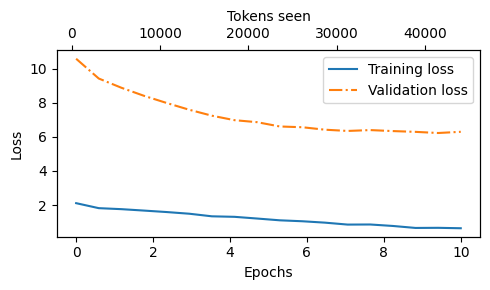

In [199]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(
    epochs_seen, val_losses, linestyle="-.", label="Validation loss"
    )
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny() #1
    ax2.plot(tokens_seen, train_losses, alpha=0) #2
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [200]:
model.to('cpu')
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FFN(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): Gelu()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [201]:
tokenizer = tiktoken.get_encoding('gpt2')
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("you are a really good ",tokenizer=tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M['context_length']
)
print("output_text:\n",token_ids_to_text(token_ids,tokenizer=tokenizer))

output_text:
 you are a really good  was not that the picture.

"I had the of a.



"I, I had been


In [202]:
#temperature scaling 

vocab={
"hi":0,
"I":1,
"was":2,
"trained":3,
"by":4,
"Bhavya":5,
"Goyal":6,
" ":7
}
inverse_vocab = {v:k for k ,v in vocab.items()}

In [203]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28]
)

In [204]:
probas=torch.softmax(next_token_logits,dim=-1)
next_token_id=torch.argmax(probas,dim=-1).item()
next_token_id
probas


tensor([    0.0612,     0.0016,     0.0001,     0.5744,     0.0034,     0.0001,
            0.0001,     0.3590])

In [205]:
print(inverse_vocab[next_token_id])

trained


In [206]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas , num_samples=1, replacement=True)

In [207]:
next_token_id

tensor([3])

In [208]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [
        torch.multinomial(probas,num_samples=1).item()
        for i in range(1000)

    ]
    sample_ids = torch.bincount(
        torch.tensor(sample)
    )
    print(sample_ids.shape)
    for i , freq in enumerate(sample_ids):
        print(f"{freq} x {inverse_vocab[i]}")
print(print_sampled_tokens(probas))        
    

torch.Size([8])
59 x hi
2 x I
0 x was
574 x trained
5 x by
0 x Bhavya
0 x Goyal
360 x  
None


In [209]:
def softmax_with_temp(logits,temp):
    scaled_logits = logits / temp
    return torch.softmax(scaled_logits,dim=-1)

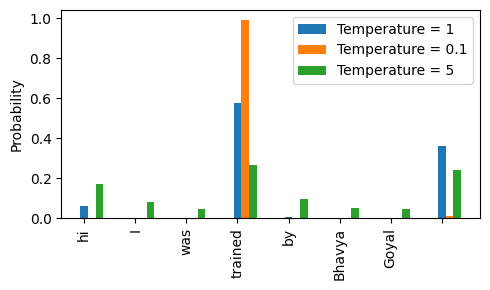

In [210]:
temperatures = [1,0.1,5]
scaled_probas = [softmax_with_temp(next_token_logits,T) for T in temperatures]
x=torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i],
          bar_width, label=f'Temperature = {T}')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


In [211]:
x


tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [212]:
top_k=4
top_logits, top_pos = torch.topk(next_token_logits,top_k)

In [213]:
test = torch.topk(next_token_logits,top_k)

In [214]:
test

torch.return_types.topk(
values=tensor([6.7500, 6.2800, 4.5100, 1.6300]),
indices=tensor([3, 7, 0, 4]))

In [215]:
print('top logits: ',top_logits)
print('top positons: ',top_pos)

top logits:  tensor([6.7500, 6.2800, 4.5100, 1.6300])
top positons:  tensor([3, 7, 0, 4])


In [216]:
new_logits = torch.where(
    condition=next_token_logits<top_logits[-1],
    input=torch.tensor(float('-inf')),
    other=next_token_logits

)
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500, 1.6300,   -inf,   -inf, 6.2800])


In [217]:
top_k_probas=torch.softmax(new_logits,dim=0)

In [218]:
def generate(model, idx,max_new_tokens, context_size,
             temperature=0.0,top_k=None,eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond=idx[: , -context_size:]
        
        with torch.no_grad():
            logits=model(idx_cond)
            
            
        logits = logits[: ,-1 , :]
        if top_k is not None:
            top_logits, _ = torch.topk(logits,top_k)
            min_val=top_logits[: , -1]
            logits = torch.where(
                logits < min_val,
                torch.tensor(float('-inf'), device=logits.device),
                logits
            )
        if temperature > 0.0:
            logits = logits / temperature
            probs=torch.softmax(logits,dim=-1)
            idx_next = torch.multinomial(probs,num_samples=1)
        else:
            idx_next  = torch.argmax(logits,dim=-1,keepdim=True)
        if idx_next==eos_id:
            break
        idx=torch.cat((idx,idx_next),dim=-1)

    return idx


In [219]:
torch.manual_seed(123)
token_ids = generate(
    model=model,
    idx=text_to_token_ids("I had",tokenizer=tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M['context_length'],
    top_k=30,
    temperature=5,)
print("output_text:",token_ids_to_text(token_ids,tokenizer=tokenizer))


output_text: I had not with an up. " was one felt have work my diagnosis " by _ was up on, my Graftis one


In [220]:
torch.save(model.state_dict(),'model.pth')

In [221]:
#loading weights into new model 

newGPTMODEL = GPTModel(GPT_CONFIG_124M)
newGPTMODEL.load_state_dict(torch.load("model.pth",map_location=device))
newGPTMODEL.eval()



/var/folders/hp/y1d826dx5fb1405ppnjjm4700000gn/T/ipykernel_24958/1438646223.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  newGPTMODEL.load_state_dict(torch.load("model

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FFN(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): Gelu()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [222]:
torch.save(
    {
        "model_state_dict":model.state_dict(),
        "model_optimizer":optimizer.state_dict()
    },
    "model_and_optimizer.pth"
)

In [223]:
checkpoint = torch.load(
    "model_and_optimizer.pth",map_location=device
)
SECOND_GPT_MODEL = GPTModel(
    GPT_CONFIG_124M
)
SECOND_GPT_MODEL.load_state_dict(
    checkpoint['model_state_dict']
)
optimizer = torch.optim.AdamW(
    SECOND_GPT_MODEL.parameters(),
    lr=5e-4,
    weight_decay=0.1
)
optimizer.load_state_dict(
    checkpoint['model_optimizer']
)
SECOND_GPT_MODEL.train()

/var/folders/hp/y1d826dx5fb1405ppnjjm4700000gn/T/ipykernel_24958/2448505592.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FFN(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): Gelu()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [224]:
import urllib.request
url = (
"https://raw.githubusercontent.com/rasbt/"
"LLMs-from-scratch/main/ch05/"
"01_main-chapter-code/gpt_download.py"
)
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, filename)

('gpt_download.py', <http.client.HTTPMessage at 0x9375cf1d0>)

In [225]:
from gpt_download import download_and_load_gpt2

setting , params = download_and_load_gpt2(
    model_size='124M' , models_dir="gpt2"
)

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [226]:
print("settings:",setting) # similar to my defined gpt_config_124M

print("parameters dictionary keys:",params.keys())

settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
parameters dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [227]:
print(params['wpe'].shape)

(1024, 768)


In [228]:
model_configs = {
    "gpt2-S (124M)":{"emb_dim":768,"n_layers":12,"n_heads":12},
    "gpt2-M (355M)":{"emb_dim":1024,"n_layers":24,"n_heads":16},
    "gpt2-L (774M)":{"emb_dim":1280,"n_layers":36,"n_heads":20},
    "gpt2-XL (1558M)":{"emb_dim":1600,"n_layers":48,"n_heads":25}
    
}

In [229]:
model_name = "gpt2-S (124M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

In [230]:
NEW_CONFIG.update({'context_length':1024})

In [231]:
NEW_CONFIG

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'bias_': False}

In [232]:
NEW_CONFIG.update({"bias_":True})

In [233]:
GPT_MODEL_PRETRAINED_BY_OPENAI = GPTModel(
    NEW_CONFIG
    
)

In [234]:
def assign(left ,right):
    if left.shape !=  right.shape:
        raise ValueError(
            f'shape mismatch. Left:{left.shape} ,'
            f"Right: {right.shape}"
        )
    return torch.nn.Parameter(torch.tensor(right))

In [235]:
import numpy as np

def load_weights_into_gpt(gpt, params): #1
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    for b in range(len(params["blocks"])): #2
        attention = gpt.trf_blocks[b].attention
        q_w, k_w, v_w = np.split( #3
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        attention.W_query.weight = assign(
            attention.W_query.weight, q_w.T)
        attention.W_key.weight = assign(
            attention.W_key.weight, k_w.T)
        attention.W_value.weight = assign(
            attention.W_value.weight, v_w.T)
        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        attention.W_query.bias = assign(
            attention.W_query.bias, q_b)
        attention.W_key.bias = assign(
            attention.W_key.bias, k_b)
        attention.W_value.bias = assign(
            attention.W_value.bias, v_b)
        attention.out_proj.weight = assign(
            attention.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        attention.out_proj.bias = assign(
            attention.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])


In [236]:
load_weights_into_gpt(GPT_MODEL_PRETRAINED_BY_OPENAI, params)
GPT_MODEL_PRETRAINED_BY_OPENAI.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FFN(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): Gelu()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768

In [239]:
torch.manual_seed(123)

token_ids=generate(
    model=GPT_MODEL_PRETRAINED_BY_OPENAI,
    idx=text_to_token_ids(text="hi" ,tokenizer=tokenizer).to(device),
    max_new_tokens=30,
    context_size=NEW_CONFIG['context_length'],
    top_k=10,
    temperature=1.5
)
print("output text:\n",token_ids_to_text(token_ids,tokenizer=tokenizer))

output text:
 hi the Red Flag. He was one of course and one of our top five, but that does not mean the Red and Blue and Green will be our


In [240]:
model_name = "gpt2-XL (1558M)"
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

In [241]:
NEW_CONFIG.update({"context_length":1024})

In [245]:
NEW_CONFIG.update({"bias_": True})
NEW_CONFIG

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 1600,
 'n_heads': 25,
 'n_layers': 48,
 'drop_rate': 0.1,
 'bias_': True,
 'qkv_bias': True}